In [20]:

import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer 
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd

# Finding Period
### assume g which doesnt share factors with N, where N is the product of two primes p & q.
### if we multiply g (suppose to the power of r) with itself we observe that the remainder of this when divided by N will eventually be equal to 1

## g^r = mN + 1

## We also observe that there is always a repetition of remainders, i.e. they cycle after a certain period.

[1, 8, 64, 50, 15, 43, 36, 57, 71, 29]


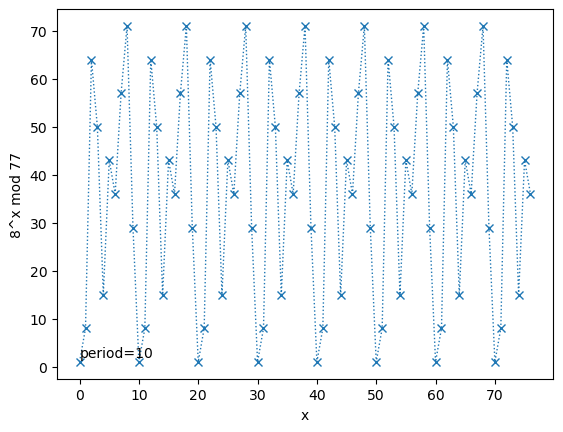

In [21]:
N = 77
g = 8


 
x= np.arange(N)
y =[]


for i in x:
    y.append(pow(g, int(i), N))

print(y[:y[1:].index(1)+1])

plt.plot(x, y, 'x:', linewidth=1)
plt.xlabel('x')
plt.ylabel(f'{g}^x mod {N}')



try:
    period = y[1:].index(1) + 1
    
    plt.annotate(f'period={period}' ,xy = (0,2) )
except ValueError:
    print('Could not find period, check a < N and have no common factors.')

plt.show()


## using quantum phase estimation on the unitary operator

# Using Easier Values
## N=15
## g =7

### Controlled multiplication by a mod 15

[1, 7, 4, 13]


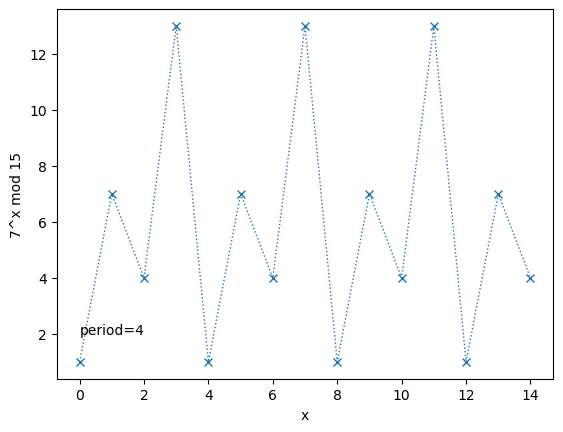

In [22]:
N = 15
g = 7


 
x= np.arange(N)
y =[]


for i in x:
    y.append(pow(g, int(i), N))

print(y[:y[1:].index(1)+1])

plt.plot(x, y, 'x:', linewidth=1)
plt.xlabel('x')
plt.ylabel(f'{g}^x mod {N}')



try:
    period = y[1:].index(1) + 1
    
    plt.annotate(f'period={period}' ,xy = (0,2) )
except ValueError:
    print('Could not find period, check a < N and have no common factors.')

plt.show()


In [23]:
#vars 
ncount = 8  # number of counting qubits
g = 7

def are_coprime(a, N):
    return gcd(a, N) == 1

def amod15(a, power):
    
    if not are_coprime(a, 15): 
        raise ValueError("'a' and 15 must be coprime")
    U = QuantumCircuit(len(bin(15)[2:])) 
   
    
    for _ in range(power):
        if a in [2,13]: #0010,1101
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]: #0111,1000
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]: #0100,1011
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]: #0111, 1011, 1101
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    c_U = U.control() 
    return c_U


In [24]:
def qft_dagger(n):
   
    qc = QuantumCircuit(n)
    
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

In [25]:

qc = QuantumCircuit(ncount + 4, ncount)


for q in range(ncount):
    qc.h(q) 
    
qc.x(ncount)
for q in range(ncount):
    qc.append(amod15(g, 2**q), [q] + [i+ncount for i in range(4)])

# inverse-QFT
qc.append(qft_dagger(ncount), range(ncount)) 
#mesure
qc.measure(range(ncount), range(ncount))
qc.draw(fold=-1)  # dont fold

┌───┐                                                                                                                             ┌───────┐┌─┐                     
 q_0: ┤ H ├───────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├─────────────────────
      ├───┤       │                                                                                                                     │       │└╥┘┌─┐                  
 q_1: ┤ H ├───────┼──────────────■──────────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├─╫─┤M├──────────────────
      ├───┤       │              │                                                                                                      │       │ ║ └╥┘┌─┐               
 q_2: ┤ H ├───────┼──────────────┼──────────────■───────────────────────────────────────────────────────────────────────────────────────┤2      ├─╫──╫─┤M├───────────────
      ├───┤       │              │              │                                                                                       │       │ ║  ║ └╥┘┌─┐            
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■────────────────────────────────────────────────────────────────────────┤3      ├─╫──╫──╫─┤M├────────────
      ├───┤       │              │              │              │                                                                        │  QFT† │ ║  ║  ║ └╥┘┌─┐         
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────■─────────────────────────────────────────────────────────┤4      ├─╫──╫──╫──╫─┤M├─────────
      ├───┤       │              │              │              │              │                                                         │       │ ║  ║  ║  ║ └╥┘┌─┐      
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────■─────────────────────────────────────────┤5      ├─╫──╫──╫──╫──╫─┤M├──────
      ├───┤       │              │              │              │              │               │                                         │       │ ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────■─────────────────────────┤6      ├─╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤       │              │              │              │              │               │               │                         │       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────┼────────────────■────────┤7      ├─╫──╫──╫──╫──╫──╫──╫─┤M├
      ├───┤┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐└───────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 q_8: ┤ X ├┤0            ├┤0            ├┤0            ├┤0            ├┤0             ├┤0             ├┤0             ├┤0              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
      └───┘│             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
 q_9: ─────┤1            ├┤1            ├┤1            ├┤1            ├┤1             ├┤1             ├┤1             ├┤1              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 ││  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_10: ─────┤2            ├┤2            ├┤2            ├┤2            ├┤2             ├┤2             ├┤2             ├┤2              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_11: ─────┤3            ├┤3            ├┤3            ├┤3            ├┤3             ├┤3       

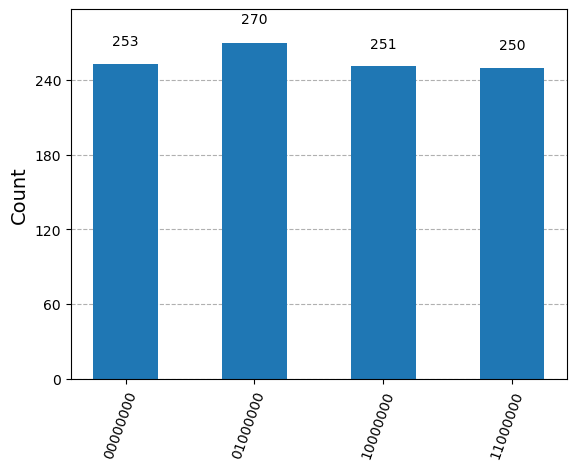

In [26]:
#MEASUREMENTS
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
counts = aer_sim.run(t_qc).result().get_counts()
plot_histogram(counts)

# Theses are possible measured phases  m

In [27]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  
    phase = decimal/(2**ncount)  
    measured_phases.append(phase)
   
    rows.append([f"{output}(bin) = {decimal:>3}(dec)",
                 f"{decimal}/{2**ncount} = {phase:.2f}"])
 

df = pd.DataFrame(rows, columns=["Register Output", "Phase"])
print(df)

            Register Output           Phase
0  00000000(bin) =   0(dec)    0/256 = 0.00
1  01000000(bin) =  64(dec)   64/256 = 0.25
2  11000000(bin) = 192(dec)  192/256 = 0.75
3  10000000(bin) = 128(dec)  128/256 = 0.50


In [28]:
from fractions import Fraction

# applying fractions on measured phases

In [29]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase,
                 f"{frac.numerator}/{frac.denominator}",
                 frac.denominator])


df = pd.DataFrame(rows, columns=["Phase", "Fraction", "Guess for r"])
print(df)

   Phase Fraction  Guess for r
0   0.00      0/1            1
1   0.25      1/4            4
2   0.75      3/4            4
3   0.50      1/2            2


#### Two measured eigenvalues gave the correct result, showing that Shor's algorithm can sometimes fail. This is often due to a and N not being coprime or receiving a factor of N instead of a. The simplest fix is to repeat the experiment until a suitable a is found.

In [34]:
def qpe_amod15(a):
  
    ncount = 8
    qc = QuantumCircuit(4+ncount, ncount)
    for q in range(ncount):
        qc.h(q)      
    qc.x(ncount)  
    for q in range(ncount): 
        qc.append(amod15(a, 2**q),
                 [q] + [i+ncount for i in range(4)])
    qc.append(qft_dagger(ncount), range(ncount)) # IQFT
    qc.measure(range(ncount), range(ncount))
   
    aer_sim = Aer.get_backend('aer_simulator')
    # memory=True   save each measurement in a list
    job = aer_sim.run(transpile(qc, aer_sim), shots=1, memory=True)
    readings = job.result().get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**ncount)
    print(f"Corresponding Phase: {phase}")
    return phase

In [35]:
phase = qpe_amod15(g) # Phase = s/r
Fraction(phase).limit_denominator(15)

Register Reading: 11000000
Corresponding Phase: 0.75


Fraction(3, 4)

In [36]:
frac = Fraction(phase).limit_denominator(15)
s, r = frac.numerator, frac.denominator
print(r)

4


#### we find r is 4 

Now we have \( r \), we might be able to use this to find a factor of \( N \). Since:

$$
a^r \equiv 1 \, (\text{mod} \, N)
$$

then:

$$
a^r - 1 \equiv 0 \, (\text{mod} \, N)
$$

which means \( N \) must divide \( a^r - 1 \). And if \( r \) is also even, then we can write:

$$
a^{r/2} - 1 \equiv 0 \, (\text{mod} \, N) \quad \text{and} \quad a^{r/2} + 1 \equiv 0 \, (\text{mod} \, N)
$$

(if \( r \) is not even, we cannot go further and must try again with a different value for \( a \)). There is then a high probability that the greatest common divisor of \( N \) and either \( a^{r/2} - 1 \), or \( a^{r/2} + 1 \), is a proper 


In [37]:
def compute_guesses(a, r, N):
    return [gcd(a**(r//2) - 1, N), gcd(a**(r//2) + 1, N)]


In [40]:
compute_guesses(g,r,N)

[3, 5]

### Keeps guessing until non trivial factor found

In [42]:
g = 7
FACTOR_FOUND = False
ATTEMPT = 0
while not FACTOR_FOUND:
    ATTEMPT += 1
    print(f"\nATTEMPT {ATTEMPT}:")
    phase = qpe_amod15(g) # phase = s/r
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    print(f"Result: r = {r}")
    if phase != 0:
        
        guesses = compute_guesses(g, r, N)
        print(f"Guessed Factors: {guesses[0]} and {guesses[1]}")
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0:
                # Guess is a factor!
                print(f"*** Non-trivial factor found: {guess} ***")
                FACTOR_FOUND = True


ATTEMPT 1:
Register Reading: 11000000
Corresponding Phase: 0.75
Result: r = 4
Guessed Factors: 3 and 5
*** Non-trivial factor found: 3 ***
*** Non-trivial factor found: 5 ***


# applying it on decryption of RSA

In [46]:
import random
from sympy import gcd, mod_inverse

def generate_keys():
    p = 5   
    q = 3 
    N = p * q
    phi = (p - 1) * (q - 1)

    e = 65537  
    d = mod_inverse(e, phi)  
    
    return (e, N), (d, N)  # public, private

def encrypt(message, public):
    e, N = public
    # Encrypt the message using the public key
    return [pow(ord(char), e, N) for char in message]   
    
def decrypt(public, ciphertext):
    g = 7
    FACTOR_FOUND = False
    ATTEMPT = 0

    e, N = public
    while not FACTOR_FOUND:
        ATTEMPT += 1
        print(f"\nATTEMPT {ATTEMPT}:")
        phase = qpe_amod15(g) # phase = s/r
        frac = Fraction(phase).limit_denominator(N)
        r = frac.denominator
        print(f"Result: r = {r}")
        if phase != 0:
            
            guesses = compute_guesses(g, r, N)
            print(f"Guessed Factors: {guesses[0]} and {guesses[1]}")
            for guess in guesses:
                if guess not in [1,N] and (N % guess) == 0:
                   
                    print(f"*** Non-trivial factor found: {guess} ***")
                    
                    FACTOR_FOUND = True
                    
                    other_factor = N // guess
                    print(f"Other Factor : {other_factor}")
                     
                    d = mod_inverse(e, (guess - 1)*(other_factor - 1))  # Private key 
                     
                     
            
                     
                    decrypted = ''.join(chr(pow(char, d, N)) for char in ciphertext)
              
                    return decrypted
                    

        
 
public, private = generate_keys()
print(generate_keys())
message = "ABC"
encrypted = encrypt(message, public)
decrypted = decrypt(public,encrypted)

print("Original Message:", message)
print("Encrypted Message:", encrypted)


print("Decrypted Message:", decrypted)




((65537, 15), (1, 15))

ATTEMPT 1:
Register Reading: 11000000
Corresponding Phase: 0.75
Result: r = 4
Guessed Factors: 3 and 5
*** Non-trivial factor found: 3 ***
Other Factor : 5
Original Message: ABC
Encrypted Message: [5, 6, 7]
Decrypted Message: 


#### We observe that the factors are correct because we have written code for only N = 15. but we won't get decryption as N=15 is very small

#### We must use larger prime numbers and also We can try to use mixture of quantum and classical to find correct factors until we get a reasonable output